# User info统计分析

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from simulator import load_av_ue_info
av_ues_info = load_av_ue_info()

# 1.buffer of user

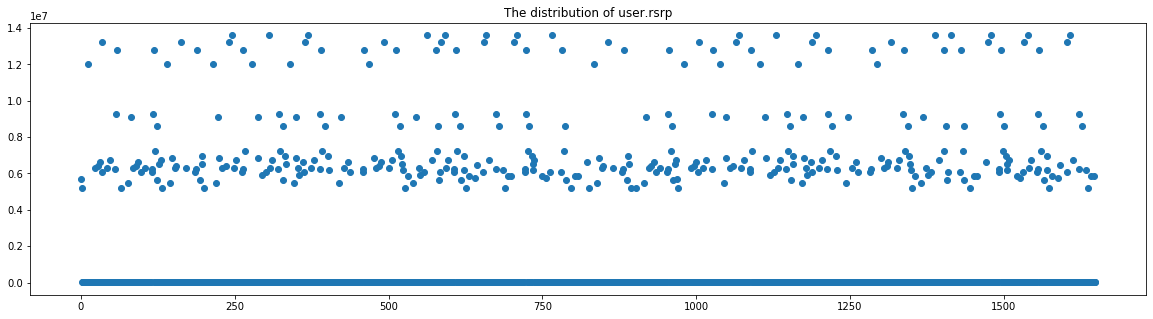

In [12]:
user_info_buffer = []
for i in range(len(av_ues_info)):
    user_info_buffer.append(av_ues_info[i]['buffer'])
plt.figure(figsize=(20, 5))
plt.scatter(range(len(user_info_buffer)), user_info_buffer)
plt.title('The distribution of user.rsrp')
plt.show()

# 2.rsrp of user

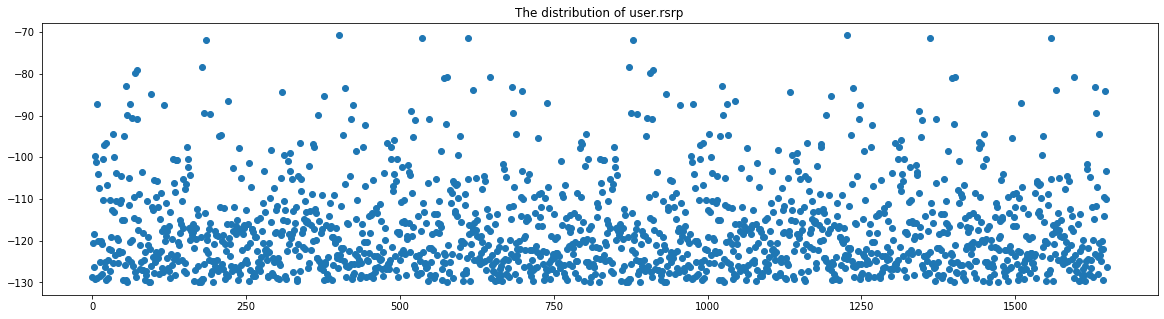

In [13]:
user_info_rsrp = []
for i in range(len(av_ues_info)):
    user_info_rsrp.append(av_ues_info[i]['rsrp'])
plt.figure(figsize=(20, 5))
plt.scatter(range(len(user_info_rsrp)), user_info_rsrp)
plt.title('The distribution of user.rsrp')
plt.show()

In [6]:
len(av_ues_info[0]['cqi']['rb_cqi'])

3900

# summary

In [10]:
user_info = pd.DataFrame(
    {
        'buffer':user_info_buffer,
        'rsrp':user_info_rsrp}
)
user_info.describe()

,buffer,rsrp
count,1.650000e+03,1650.000000
mean,1.741364e+06,-117.332412
std,3.466254e+06,11.075240
min,4.400000e+03,-129.990000
25%,5.848000e+03,-125.480000
50%,1.244800e+04,-120.240000
75%,3.640000e+04,-112.570000
max,1.359557e+07,-70.800000


# Simulator日志分析

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
RL_TXT = 'log/reward=avg/eval_experiment5/bursty_simulator_rl.txt'
OP_TXT = 'log/reward=avg/eval_experiment5/bursty_simulator_op.txt'
USER_NUM = 10
TTI_SUM = 500

In [11]:
def transmission_time(log_file, user_num, tti_sum):
    log = []
    with open(log_file, 'r') as file:
        log = file.readlines()
        
    user = []
    for i in range(user_num):
        user.append(log[2 + 8 * i][0:24] + '[0,0]')
    
    counts = np.zeros(user_num)
    for item in log:
        for i in range(USER_NUM):
            if user[i] in item:
                counts[i] += 1
    
    return tti_sum - counts

In [12]:
counts_rl = transmission_time(RL_TXT, USER_NUM, TTI_SUM)
counts_op = transmission_time(OP_TXT, USER_NUM, TTI_SUM)
print('RL time cost={}'.format(counts_rl))
print('OP time cost={}'.format(counts_op))

RL time cost=[ 19.  18.  16.  15.  14.  11. 500.  28.  30.  31.]
OP time cost=[212.   7.  23.   7.  92. 281. 500. 209.   9.  18.]


In [13]:
print(sum(counts_rl), sum(counts_op))

682.0 1358.0
